# Understanding Simple Recurrent Neural Networks

A remix of a Python Notebook by F. Chollet.

## Let's start by preprocessing the data

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 1000  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 1000)
input_test shape: (25000, 1000)


Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

In [4]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.6140 - acc: 0.6456 - val_loss: 0.4888 - val_acc: 0.7734
Epoch 2/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.3971 - acc: 0.8317 - val_loss: 0.4174 - val_acc: 0.8144
Epoch 3/10
20000/20000 [==============================] - 79s 4ms/step - loss: 0.2987 - acc: 0.8792 - val_loss: 0.3971 - val_acc: 0.8256
Epoch 4/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.2191 - acc: 0.9147 - val_loss: 0.3747 - val_acc: 0.8538
Epoch 5/10
20000/20000 [==============================] - 90s 4ms/step - loss: 0.1437 - acc: 0.9483 - val_loss: 0.5230 - val_acc: 0.7786
Epoch 6/10
20000/20000 [==============================] - 83s 4ms/step - loss: 0.0950 - acc: 0.9680 - val_loss: 0.3886 - val_acc: 0.8520
Epoch 7/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.0615 - acc: 0.9807 - val_loss: 0.6495 - val_acc:

Let's display the training and validation loss and accuracy:

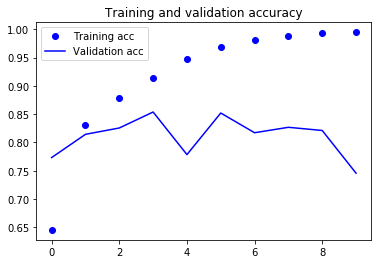

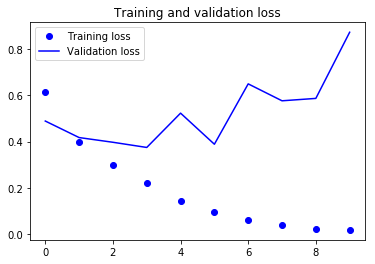

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As a reminder, our very first naive approach to this very dataset got us to 88% test accuracy. Unfortunately, our small 
recurrent network doesn't perform very well at all compared to this baseline (only up to 85% validation accuracy). Part of the problem is 
that our inputs only consider the first 500 words rather the full sequences -- 
hence our RNN has access to less information than our earlier baseline model. The remainder of the problem is simply that `SimpleRNN` isn't very good at processing long sequences, like text. Other types of recurrent layers perform much better. We will look at these in a future notebook.